# Exercise: Model Evaluation


`#scikit-learn` `#model-evaluation` `#regression-metrics` `#classification-metrics`


> Objectives:
>
> - Understand different evaluation metrics for regression and classification models
> - Use Scikit-Learn to evaluate model performance


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [1]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start

- [x] Run this cell to record your start time:


In [2]:
deep_atlas.log_start_time()

🚀 Success! Get started...


---


## Context


Evaluating machine learning models is a crucial step in understanding their performance and ensuring they generalize well to new data. Different models require different evaluation criteria to accurately measure their effectiveness.

In this exercise, we will:

1. Explore evaluation metrics for regression models.
2. Explore evaluation metrics for classification models.


## Imports


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

## Data Generation


We will create two synthetic datasets: one for regression and one for classification. This will help us illustrate different evaluation metrics.

- [x] Generate the regression dataset:


In [4]:
X_reg, y_reg = make_regression(
    n_samples=200, n_features=1, noise=10, random_state=42
)

# Split the data into training and test sets:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

- [x] Generate the classification dataset:


In [5]:
X_clf, y_clf = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Split the data into training and test sets:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

## Regression Evaluation


Regression models predict continuous values. Common evaluation metrics for regression include Mean Absolute Error (MAE) and Mean Squared Error (MSE).

To see these metrics in action, let's instantiate and train a linear regression model, and use it to make predictions.

- [x] Instantiate the `LinearRegression` model:


In [6]:
model = LinearRegression()

<details>
<summary>Solution:</summary>

```py
model = LinearRegression()
```

</details>


- [x] Fit the model to the data we generated above:


In [8]:
model.fit(X_train_reg, y_train_reg)

LinearRegression()

<details>
<summary>Solution:</summary>

```py
model.fit(X_train_reg, y_train_reg)
```

</details>


- [x] Produce predictions using the test set:


In [9]:
predictions = model.predict(X_test_reg)

<details>
<summary>Solution:</summary>

```py
predictions = model.predict(X_test_reg)
```

</details>


Now that we have predictions, let's evaluate how close they are to the expected outputs (`y_test_reg`), starting with the Mean Absolute Error.

**_Mean Absolute Error (MAE)_** measures the average magnitude of errors between predicted and actual values, without considering their direction.

- The "absolute" part ensures all errors are treated equally, preventing positive and negative errors from canceling each other out.
- Taking the "mean" provides a single representative value for the model's average error across all predictions, allowing for easy comparison between models.

MAE is useful when you want a straightforward measure of average prediction error that treats all deviations equally, making it easy to interpret and compare across models without emphasizing larger errors.

- [x] Calculate the MAE, using the SciKit-Learn utility function `mean_absolute_error`
  - It accepts two positional arguments:
    - the expected outputs
    - the predicted outputs


In [10]:
mae = mean_absolute_error(y_test_reg, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 8.02


<details>
<summary>Solution:</summary>

```py
mae = mean_absolute_error(y_test_reg, predictions)
```

</details>


Next we have Mean Squared Error.

**_Mean Squared Error (MSE)_** measures the average of the _squared_ differences between predicted and actual values, emphasizing larger errors by squaring them, which prevents negative and positive errors from canceling each other out. Taking the "mean" provides an overall measure of error across all predictions, highlighting models with fewer large errors and offering a smooth, differentiable loss function useful for optimization.

MSE is useful when you want to heavily penalize larger errors, making it ideal for situations where large deviations from the true values are particularly undesirable.

- [x] Calculate the MSE, using `mean_squared_error`:
  - It accepts the same arguments as `mean_absolute_error`


In [11]:
mse = mean_absolute_error(y_test_reg, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 8.02


<details>
<summary>Solution:</summary>

```py
mse = mean_squared_error(y_test_reg, predictions)
```

</details>


These evaluation metrics can be used in any context where continuous, numeric expected values need to be compared with continuous, numeric predicted values, including evaluation of image reconstruction (how far away pixel values are from each other), embedding distance metrics (comparing the locations of embedded vectors), etc.


## Classification Evaluation


Classification models predict discrete class labels (as opposed to numeric values from a continuous range).

We use metrics such as Accuracy, Precision, Recall, and F1 Score to evaluate these models.

- [ ] First, create the model we will be evaluating:


In [13]:
model = LogisticRegression()

<details>
<summary>Solution:</summary>

```py
model = LogisticRegression()
```

</details>


- [ ] Fit the model to the classifier training data we generated earlier:


In [15]:
model.fit(X_train_clf, y_train_clf)

LogisticRegression()

<details>
<summary>Solution:</summary>

```py
model.fit(X_train_clf, y_train_clf)
```

</details>


- [x] Create predictions, which we can use in the calculation of the model


In [16]:
predictions = model.predict(X_test_clf)

<details>
<summary>Solution:</summary>

```py
model.predict(X_test_clf)
```

</details>


Now that we have predictions, let's perform some evaluation...

**_Accuracy_** measures the proportion of correctly classified instances out of the total instances. It is the simplest evaluation metric and represents the overall effectiveness of a model.

Accuracy is useful when:

1. the class distribution is balanced
2. all types of errors (false positives and false negatives) are equally costly.

- [x] Calculate accuracy using the `accuracy_score` function:


In [19]:
accuracy = accuracy_score(y_test_clf, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


<details>
<summary>Solution:</summary>

```py
accuracy = accuracy_score(y_test_clf, predictions)
```

</details>


**_Precision_** measures the proportion of true positive predictions out of all positive predictions (true positives + false positives). It reflects the model's ability to correctly identify only the relevant instances.

Precision is useful when the cost of false positives is high, such as in spam detection, where you want to minimize the risk of incorrectly labeling important emails as spam.

- [x] Calculate precision using the `precision_score` function:


In [20]:
precision = precision_score(y_test_clf, predictions)
print(f"Precision: {precision:.2f}")

Precision: 0.77


<details>
<summary>Solution:</summary>

```py
precision = precision_score(y_test_clf, predictions)
```

</details>


**_Recall_** (also known as Sensitivity or True Positive Rate) measures the proportion of true positive predictions out of all actual positive instances (true positives + false negatives). It indicates the model's ability to capture all relevant instances.

Recall is useful when the cost of false negatives is high, such as in medical diagnostics, where failing to identify a disease could have severe consequences.

- [x] Calculate recall using the `recall_score` function:


In [21]:
recall = recall_score(y_test_clf, predictions)
print(f"Recall: {recall:.2f}")

Recall: 1.00


<details>
<summary>Solution:</summary>

```py
recall = recall_score(y_test_clf, predictions)
```

</details>


**_F1 Score_** is the harmonic mean of Precision and Recall, providing a single metric that balances both. It ranges between 0 and 1, with 1 being perfect precision and recall.

F1 Score is useful when there is an uneven class distribution, or when a balance between precision and recall is required, making it ideal for scenarios where both false positives and false negatives carry significant costs.

- [x] Calculate the F1 score using the `f1_score` function:


In [22]:
f1 = f1_score(y_test_clf, predictions)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.87


<details>
<summary>Solution:</summary>

```py
f1 = f1_score(y_test_clf, predictions)
```

</details>


The evaluation metrics above are useful for variations of classification including binary classification and supervised anomaly detection.


### Visualizing classification


It is often useful, during early stages of the mode development lifecycle, to _visually_ assess the errors / error rates of a model.

For classification models, we can visualize confusion matrices or even plot the data overlaid by the model's decision boundary.

**_A confusion matrix_** is a table used to evaluate the performance of a classification model. It shows the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions.

- Each row of the matrix represents the number of instances in an actual class
- Each column represents the instances in a predicted class.

The confusion matrix is useful for understanding the specific types of errors a model makes.

- It is especially valuable in multiclass and imbalanced classification problems, as the matrix helps identify classes that are commonly confused by the model, allowing for targeted improvements.

- [x] Generate a confusion matrix using SciKit-Learn's `confusion_matrix` utility function:


In [23]:
conf_matrix = confusion_matrix(y_test_clf, predictions)

<details>
<summary>Solution:</summary>

```py
conf_matrix = confusion_matrix(y_test_clf, predictions)
```

</details>


- [x] Once we have the grid, we can plot it using matplotlib:


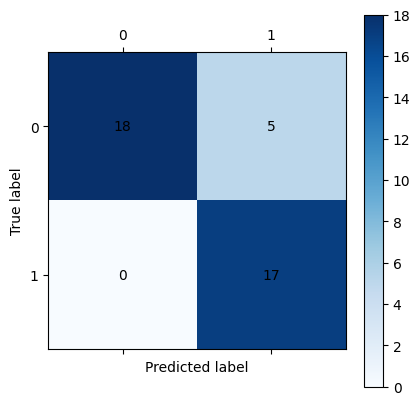

In [24]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va="center", ha="center")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

We can see from the visual how the model...

- Predicted (18 + 17) items correctly,
- Never predicted 0 when the true label was 1
- Made mistakes 5 times by predicting 1 when the true label was 0

In addition to visualizing the quality of predictions, we can also introspect models by visualizing the boundaries they use to generate regressions, or — in this case — bisect the dataset.

- [x] Run this cell to see all the data points plotted along two feature axes:
  - Overlaid, you can see the decision boundary arrived at by the `LogisticRegression` model.
  - Note that in practice the boundary is going to be blurry.


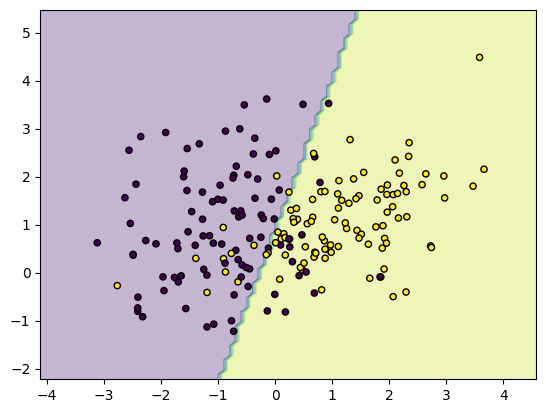

In [25]:
# Calculate the bounds of the visualization and where to plot the data points:
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)
)

# Calculate the decision boundary by predicting the labels:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary:
plt.contourf(xx, yy, Z, alpha=0.32)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=20, edgecolor="k")
plt.show()

These kinds of visualization help us debug our data and model selection processes in a more intuitive manner.


### 🚦 Checkpoint: Stop

- [x] Uncomment this code
- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time:


```python
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": 00:30,
#         # Did you feel finished with this section (Yes/No):
#         "finished": yes,
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 4,
#         # How useful was this section? (1–5)
#         "usefulness": 4,
#         # Did you skip any steps?
#         "skipped_steps": no,
#         # Any obvious opportunities for improvement?
#         "suggestions": [],
#     }
# )
# deep_atlas.log_stop_time()
```


## You did it!


In this exercise, we explored different evaluation metrics for regression and classification models. We demonstrated the importance of choosing appropriate metrics for different model types and how these metrics provide insights into model performance.

By understanding model evaluation, you'll be better equipped to assess and improve machine learning models in various scenarios.

In future exercises and projects, make sure to research which evaluation metrics match your choice of model.


### Resources


A sampling of other task types and (possibly useful) corresponding evaluation metrics:

1. **Clustering**

   - Silhouette Score
   - Adjusted Rand Index (ARI)
   - Davies-Bouldin Index

2. **Anomaly Detection**

   - AUC-ROC
   - Precision-Recall Curve

3. **Ranking and Information Retrieval**

   - Mean Average Precision (MAP)
   - Normalized Discounted Cumulative Gain (NDCG)
   - Hit Rate

4. **Multiclass and Multilabel Classification**

   - Confusion Matrix
   - Macro and Micro Averages

5. **Time Series Forecasting**
   - Mean Absolute Percentage Error (MAPE)
   - Root Mean Squared Error (RMSE)
